Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read csv file
df = pd.read_csv('commits.csv')
df['Commited Date'] = pd.to_datetime(df['Commited Date'])
df = df.sort_values(by='Commited Date')
df.index = [i for i in range(1,df.shape[0]+1)]

# Correcting the Contributor column
for i in range(1,df.shape[0]+1):
    if df.loc[i,'Author'] == df.loc[i,'Contributor']:
        df.loc[i,'Contributor'] = df.loc[i,'Author'].replace(' ','')
# Detect which Authors changed their Github name and change their Contributor id to the latest time
dict = {df.loc[i,'Author'] : df.loc[i,'Contributor'] for i in range(1,df.shape[0]+1)}
for i in range(1,df.shape[0]+1):
    df.loc[i,'Contributor'] = dict[df.loc[i,'Author']]
# Set commited date as index
df.set_index('Commited Date', inplace=True)
df['Author'].unique().size == df['Contributor'].unique().size

True

In [3]:
date_df = pd.DataFrame(index=np.unique(df.index.values))
date_df['Count'] = (df.index.value_counts().get(date for date in date_df.index.values))
date_df['Month'] = date_df.index.to_period('M')
monthly_counts = date_df.groupby('Month')['Count'].sum()
date_df

,Count,Month
2023-01-02,15,2023-01
2023-01-03,5,2023-01
2023-01-04,4,2023-01
2023-01-05,3,2023-01
2023-01-06,1,2023-01
...,...,...
2023-12-27,6,2023-12
2023-12-28,7,2023-12
2023-12-29,1,2023-12
2023-12-30,3,2023-12


Top 5 Months with the most Commits

In [4]:
monthly_counts.sort_values(ascending=False).head()

Month
2023-08    280
2023-07    273
2023-09    266
2023-10    255
2023-11    207
Freq: M, Name: Count, dtype: int64

Visualization

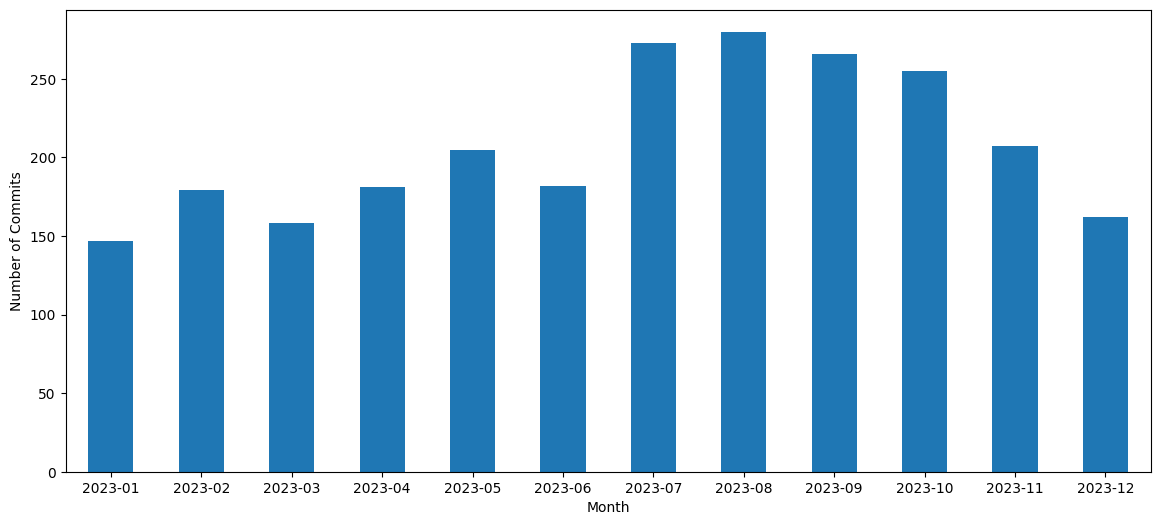

In [5]:
monthly_counts.plot.bar(ylabel="Number of Commits", figsize=(14, 6))
plt.xticks(rotation=0) 
plt.show()

Total Contributors in 2023

In [6]:
df['Author'].unique()

array(['Zeeshan Tamboli', 'Olivier Tassinari', 'Benny Joo',
       'renovate[bot]', 'Marija Najdova', 'Hamir Mahal', 'sai chand',
       'Michał Dudak', 'Flavien DELANGLE', 'Zach Case', 'Matthew Soyka',
       'Konrad Ryczko', 'Siriwat K', 'Sam Sycamore', 'Dara',
       'miha53cevic', 'dependabot[bot]', 'Alexandre Fauquette', 'max',
       'Alexander Trefonas', 'Lukas', 'Victor He', 'Volha Linkevich',
       'fenghan34', 'Eng Zer Jun', 'Pubudu Dodangoda', 'oliv37',
       'Rosita Dmello', 'Petyo Ivanov', 'Albert Yu',
       'José Rodolfo Freitas', 'SaidMarar', 'Luke M', 'idebeijer',
       'Vivek Prajapati', 'Mark Toman', 'Sebastian Silbermann', 'badal',
       'Ali Gorji', 'Arthur Pedroti', 'Alex Ownejazayeri', 'Chuan yu',
       'yoskeoka', 'Matheus Wichman', 'Sarah', 'Shorif', 'Danilo Leal',
       'Donald33 Wang', 'Dawid Rusnak', 'Daniel Martín', 'Punit Soni',
       'aleff menna resler', 'Vadim I', 'Jacob Parish', 'Bilal Shafi',
       'Kiichi Tachibana', 'Makien Osman', 'Varun Mu

In [8]:
contributor_df = pd.DataFrame(index=df['Contributor'].unique())
contributor_df.index.name = 'Contributor'
contributor_df['Author'] = df['Author'].unique()
contributor_df


,Author
Contributor,
ZeeshanTamboli,Zeeshan Tamboli
oliviertassinari,Olivier Tassinari
hbjORbj,Benny Joo
renovate[bot],renovate[bot]
mnajdova,Marija Najdova
...,...
adamhylander,adamhylander
muazaqdas,Muaz Aqdas
Kamino0,Kamino0
